In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 270 kB 8.3 MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.21-cp37-cp37m-linux_x86_64.whl size=1444935 sha256=863b551ac5feab5ba639aae0b7b44d68aaef6dab6c2e15d4595031290aa0e2e7
  Stored in directory: /root/.cache/pip/wheels/32/3c/86/8dfaee7c11df54449f188172fcf66ae6d134f3118d0237df4a
Successfully built ta-lib


In [ ]:
# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
# !curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
# import talib

In [ ]:
import pandas as pd 
from pandas_datareader import data as pdr
# import talib 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

seed_number = 7
np.random.seed(seed_number)
python_random.seed(seed_number)
# tf.set_random_seed(seed_number) # v1
tf.random.set_seed(seed_number) # v2

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=762d23f3c43090206b6aae46784c8a070bfa6038f9d3be8e4c358ca470072978
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
yf.pdr_override()

intc_df = pdr.get_data_yahoo('INTC', start = '2000-01-01')
sox_df = pdr.get_data_yahoo('^SOX', start = '2000-01-01')
vix_df = pdr.get_data_yahoo('^VIX', start='2000-01-01')
snp500_df = pdr.get_data_yahoo('^GSPC', start='2000-01-01')

intc_df.to_csv('intc.csv')
sox_df.to_csv('sox.csv')
vix_df.to_csv('vix.csv')
snp500_df.to_csv('snp500.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# data Load
df = pd.read_csv('intc.csv',
                 index_col='Date',
                 parse_dates=True)
sox_df = pd.read_csv('sox.csv',
                     index_col='Date',
                     parse_dates=True)
vix_df = pd.read_csv('vix.csv',
                     index_col='Date',
                     parse_dates=True)
snp500_df = pd.read_csv('snp500.csv',
                        index_col='Date',
                        parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,41.632812,43.6875,41.62500,43.50000,27.002798,57710200
2000-01-04,42.718750,43.9375,41.12500,41.46875,25.741907,51019600
2000-01-05,41.500000,42.9375,40.25000,41.81250,25.955301,52389000
2000-01-06,40.875000,41.6875,39.09375,39.37500,24.442190,55171200
2000-01-07,38.750000,41.0000,38.68750,41.00000,25.450918,41096400


In [ ]:
# df['next_price'] = df['Adj Close'].shift(-1)
df['next_rtn'] = df['Close'] / df['Open'] -1
df['log_return'] = np.log(1 + df['Adj Close'].pct_change())
df['CCI'] = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=14)

#1.RA : Standard deviation rolling average
# Moving Average
df['MA5'] = talib.SMA(df['Close'],timeperiod=5)
df['MA10'] = talib.SMA(df['Close'],timeperiod=10)
df['RASD5'] = talib.SMA(talib.STDDEV(df['Close'], timeperiod=5, nbdev=1),timeperiod=5)
df['RASD10'] = talib.SMA(talib.STDDEV(df['Close'], timeperiod=5, nbdev=1),timeperiod=10)

#2.MACD : Moving Average Convergence/Divergence
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd 

# Momentum Indicators
#3.CCI : Commodity Channel Index
df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
# Volatility Indicators 

#4.ATR : Average True Range
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

#5.BOLL : Bollinger Band
upper, middle, lower = talib.BBANDS(df['Close'],timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)
df['ub'] = upper
df['middle'] = middle
df['lb'] = lower

#7.MTM1 
df['MTM1'] = talib.MOM(df['Close'], timeperiod=1)

#7.MTM3
df['MTM3'] = talib.MOM(df['Close'], timeperiod=3)

#8.ROC : Rate of change : ((price/prevPrice)-1)*100
df['ROC'] = talib.ROC(df['Close'], timeperiod=60)

#9.WPR : william percent range (Williams' %R)
df['WPR'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)

In [ ]:
snp500_df = snp500_df.loc[:,['Close']].copy()
snp500_df.rename(columns={'Close':'S&P500'},inplace=True)
sox_df = sox_df.loc[:,['Close']].copy()
sox_df.rename(columns={'Close':'SOX'},inplace=True)
vix_df = vix_df.loc[:,['Close']].copy()
vix_df.rename(columns={'Close':'VIX'},inplace=True)

df = df.join(snp500_df,how='left')
df = df.join(sox_df,how='left')
df = df.join(vix_df,how='left')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,next_rtn,log_return,CCI,MA5,MA10,RASD5,RASD10,MACD,ATR,ub,middle,lb,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,41.632812,43.6875,41.62500,43.50000,27.002798,57710200,0.044849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1455.219971,713.200012,24.209999
2000-01-04,42.718750,43.9375,41.12500,41.46875,25.741907,51019600,-0.029261,-0.047820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.03125,NaN,NaN,NaN,1399.420044,687.320007,27.010000
2000-01-05,41.500000,42.9375,40.25000,41.81250,25.955301,52389000,0.007530,0.008256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34375,NaN,NaN,NaN,1402.109985,678.539978,26.410000
2000-01-06,40.875000,41.6875,39.09375,39.37500,24.442190,55171200,-0.036697,-0.060065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.43750,-4.12500,NaN,NaN,1403.449951,669.330017,25.730000
2000-01-07,38.750000,41.0000,38.68750,41.00000,25.450918,41096400,0.058065,0.040441,NaN,41.43125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.62500,-0.46875,NaN,NaN,1441.469971,690.750000,21.719999


In [ ]:
# feature list
# feature_list = ['Adj Close', 'log_return', 'CCI','next_price']
# 볼린저 밴드와 MACD를 어떻게 활용해야할까? 음. 아님 그냥 그대로 사용하는 건가?
feature1_list = ['Open','High','Low','Adj Close','Volume','log_return']
feature2_list = ['RASD5','RASD10','ub','lb','CCI','ATR','MACD','MA5','MA10','MTM1','MTM3','ROC','WPR']
feature3_list = ['S&P500', 'SOX', 'VIX']
# feature4_list = ['next_price']
feature4_list = ['next_rtn']

all_features = feature1_list + feature2_list + feature3_list + feature4_list

In [ ]:
phase_flag = '3'

if phase_flag == '1' :
    train_from = '2010-01-04'
    train_to = '2012-01-01'

    val_from = '2012-01-01'
    val_to = '2012-04-01'

    test_from = '2012-04-01'
    test_to = '2012-07-01'

elif phase_flag == '2' :
    train_from = '2012-07-01'
    train_to = '2014-07-01'

    val_from = '2014-07-01'
    val_to = '2014-10-01'

    test_from = '2014-10-01'
    test_to = '2015-01-01'
    
else : 
    train_from = '2015-01-01'
    train_to = '2017-01-01'

    val_from = '2017-01-01'
    val_to = '2017-04-01'

    test_from = '2017-04-01'
    test_to = '2017-07-01'

In [ ]:
# train / validation / testing
train_df  = df.loc[train_from:train_to,all_features].copy()
val_df = df.loc[val_from:val_to,all_features].copy()
test_df   = df.loc[test_from:test_to,all_features].copy()

In [ ]:
sox_mean = train_df['SOX'].mean()
train_df['SOX'].fillna(sox_mean, inplace=True)

In [ ]:
train_df.head()

,Open,High,Low,Adj Close,Volume,log_return,RASD5,RASD10,ub,lb,CCI,ATR,MACD,MA5,MA10,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,next_rtn
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,30.484121,23605600,0.001927,0.360369,0.422398,37.964195,35.625804,-31.453150,0.695825,0.303488,36.828,36.961,0.070000,-0.820000,8.634596,-57.261459,2058.199951,686.729980,17.790001,-0.008454
2015-01-05,36.200001,36.450001,35.939999,30.140379,32785000,-0.011340,0.359143,0.416504,37.902114,35.536885,-87.370255,0.682552,0.216350,36.508,36.854,-0.410000,-0.809998,4.902248,-74.273902,2020.579956,673.590027,19.920000,-0.006906
2015-01-06,36.080002,36.230000,35.259998,29.578648,30847600,-0.018813,0.429746,0.417354,37.855069,35.344930,-141.831811,0.703084,0.092167,36.128,36.745,-0.670002,-1.010002,4.937537,-99.193531,2002.609985,658.830017,21.120001,-0.022173
2015-01-07,35.639999,36.070000,35.270000,30.199066,27725200,0.020758,0.449678,0.396641,37.788620,35.293380,-114.324726,0.710006,0.052853,35.980,36.626,0.740002,-0.340000,12.879977,-69.354794,2025.900024,665.270020,19.309999,0.010662
2015-01-08,36.369999,37.000000,36.259998,30.760786,31765400,0.018430,0.450896,0.396890,37.770449,35.291550,-11.701877,0.729292,0.074897,36.060,36.552,0.669998,0.739998,16.587224,-42.338775,2062.139893,684.650024,17.010000,0.008798


# 정규화

In [ ]:
def min_max_normal(tmp_df):
    eng_list = []
    sample_df = tmp_df.copy()
    for x in all_features:
        if x in feature4_list :
            continue
        series = sample_df[x].copy()
        values = series.values
        values = values.reshape((len(values), 1))
        # train the normalization
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler = scaler.fit(values)
        # print('columns : %s , Min: %f, Max: %f' % (x, scaler.data_min_, scaler.data_max_))
        # normalize the dataset and print
        normalized = scaler.transform(values)
        new_feature = '{}_normal'.format(x)
        eng_list.append(new_feature)
        sample_df[new_feature] = normalized
    return sample_df, eng_list

In [ ]:
train_sample_df, eng_list =  min_max_normal(train_df)
val_sample_df, eng_list =  min_max_normal(val_df)
test_sample_df, eng_list = min_max_normal(test_df)

In [ ]:
train_sample_df.head()

,Open,High,Low,Adj Close,Volume,log_return,RASD5,RASD10,ub,lb,CCI,ATR,MACD,MA5,MA10,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,next_rtn,Open_normal,High_normal,Low_normal,Adj Close_normal,Volume_normal,log_return_normal,RASD5_normal,RASD10_normal,ub_normal,lb_normal,CCI_normal,ATR_normal,MACD_normal,MA5_normal,MA10_normal,MTM1_normal,MTM3_normal,ROC_normal,WPR_normal,S&P500_normal,SOX_normal,VIX_normal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,30.484121,23605600,0.001927,0.360369,0.422398,37.964195,35.625804,-31.453150,0.695825,0.303488,36.828,36.961,0.070000,-0.820000,8.634596,-57.261459,2058.199951,686.729980,17.790001,-0.008454,0.878927,0.892953,0.862625,0.718574,0.174486,0.618912,0.283393,0.397438,0.873208,0.895993,0.471270,0.491009,0.611705,0.900729,0.926549,0.622449,0.408772,0.624169,0.427385,0.517622,0.335631,0.221242
2015-01-05,36.200001,36.450001,35.939999,30.140379,32785000,-0.011340,0.359143,0.416504,37.902114,35.536885,-87.370255,0.682552,0.216350,36.508,36.854,-0.410000,-0.809998,4.902248,-74.273902,2020.579956,673.590027,19.920000,-0.006906,0.842912,0.829616,0.849578,0.688809,0.264915,0.534572,0.282178,0.390239,0.866731,0.887670,0.378496,0.467702,0.576726,0.872265,0.916140,0.524490,0.410527,0.552398,0.257261,0.432631,0.301055,0.293519
2015-01-06,36.080002,36.230000,35.259998,29.578648,30847600,-0.018813,0.429746,0.417354,37.855069,35.344930,-141.831811,0.703084,0.092167,36.128,36.745,-0.670002,-1.010002,4.937537,-99.193531,2002.609985,658.830017,21.120001,-0.022173,0.833717,0.809991,0.797390,0.640168,0.245829,0.487067,0.352179,0.391277,0.861823,0.869702,0.288137,0.503756,0.526877,0.838463,0.905536,0.471428,0.375438,0.553077,0.008065,0.392034,0.262216,0.334238
2015-01-07,35.639999,36.070000,35.270000,30.199066,27725200,0.020758,0.449678,0.396641,37.788620,35.293380,-114.324726,0.710006,0.052853,35.980,36.626,0.740002,-0.340000,12.879977,-69.354794,2025.900024,665.270020,19.309999,0.010662,0.800000,0.795718,0.798158,0.693891,0.215069,0.738621,0.371941,0.365975,0.854890,0.864876,0.333775,0.515911,0.511096,0.825298,0.893959,0.759184,0.492983,0.705804,0.306452,0.444650,0.279162,0.272820
2015-01-08,36.369999,37.000000,36.259998,30.760786,31765400,0.018430,0.450896,0.396890,37.770449,35.291550,-11.701877,0.729292,0.074897,36.060,36.552,0.669998,0.739998,16.587224,-42.338775,2062.139893,684.650024,17.010000,0.008798,0.855939,0.878680,0.874136,0.742531,0.254871,0.723818,0.373148,0.366279,0.852994,0.864705,0.504040,0.549775,0.519944,0.832414,0.886759,0.744898,0.682456,0.777092,0.576612,0.526523,0.330158,0.194774


In [ ]:
def create_dateset_binary(data, feature_list, step, n):
    '''
    다음날 시종가 수익률 라벨링.
    '''
    train_xdata = np.array(data[feature_list[0:n]])
    
    # 가장 뒤 n step을 제외하기 위해. 왜냐하면 학습 input으로는 어차피 10개만 주려고 하니깐.
    m = np.arange(len(train_xdata) - step)
    #     np.random.shuffle(m)  # shufflee은 빼자.
    x, y = [], []
    for i in m:
        a = train_xdata[i:(i+step)]
        x.append(a)
    x_batch = np.reshape(np.array(x), (len(m), step, n))
    
    train_ydata = np.array(data[[feature_list[n]]])
    # n_step 이상부터 답을 사용할 수 있는거니깐. 
    for i in (m + step) :
        next_rtn = train_ydata[i][0]
        if next_rtn > 0 :
            label = 1
        else :
            label = 0
        y.append(label)
    y_batch = np.reshape(np.array(y), (-1,1))
    return x_batch, y_batch

In [ ]:
num_step = 5
num_unit = 200

In [ ]:
eng_list = eng_list + feature4_list
n_feature = len(eng_list)-1
# LSTM할때 사용했던 소스코드.
x_train, y_train = create_dateset_binary(train_sample_df[eng_list], eng_list, num_step, n_feature)
x_val, y_val = create_dateset_binary(val_sample_df[eng_list], eng_list, num_step, n_feature)
x_test, y_test = create_dateset_binary(test_sample_df[eng_list], eng_list, num_step, n_feature)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
# print(pd.DataFrame(y_train).sum())
# print(pd.DataFrame(y_val).sum())
# print(pd.DataFrame(y_test).sum())

In [ ]:
x_train.shape[1]
# 이것은 전체 데이터를 242 rolling , 10 window, 2개 feature를 본다는 것이다.
# 2개 feature를 10개 묶음으로 보는데, 1칸씩 미루면서 보니 242개 데이터를 본다는 것이다.

5

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [ ]:
# LSTM 모델을 생성한다.
K.clear_session()
input_layer = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
layer_lstm_1 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(input_layer)
layer_lstm_1 = BatchNormalization()(layer_lstm_1)
layer_lstm_2 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_1)
layer_lstm_2 = Dropout(0.25)(layer_lstm_2)
layer_lstm_3 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_2)
layer_lstm_3 = BatchNormalization()(layer_lstm_3)
layer_lstm_4 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_3)
layer_lstm_4 = Dropout(0.25)(layer_lstm_4)
layer_lstm_5 = LSTM(num_unit , recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_4)
layer_lstm_5 = BatchNormalization()(layer_lstm_5)
output_layer = Dense(2, activation='sigmoid')(layer_lstm_5)

model = Model(input_layer, output_layer)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 22)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 200)            178400    
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 200)            800       
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
dropout (Dropout)            (None, 5, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 200)            800   

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=10,
                    verbose=0,
                    validation_data = (x_val, y_val)
                    )

In [ ]:
def plot_history(history):
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"])
    plt.title("Train loss")
    ax = plt.subplot(1, 2, 2)
    plt.plot(history.history["val_loss"])
    plt.title("Test loss")


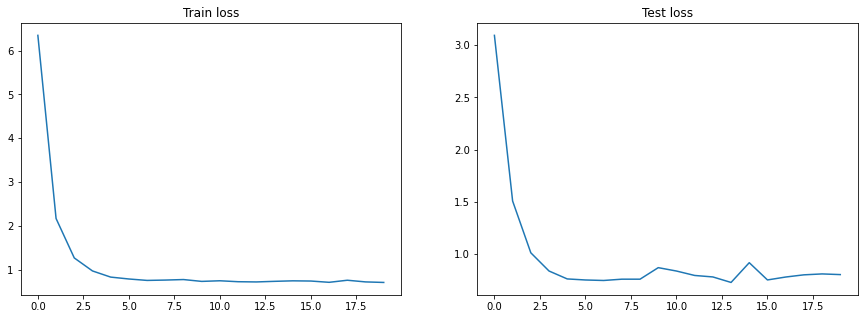

In [ ]:
plot_history(history) # 3단계

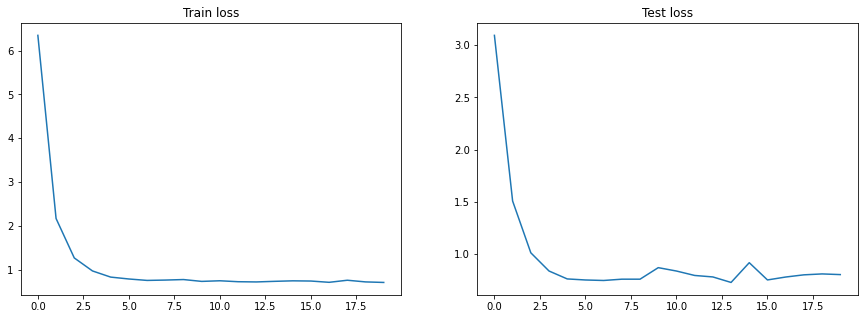

In [ ]:
plot_history(history) # 3단계

In [ ]:
# model.save('model_functional_open_close_binary_phase3.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
predicted = model.predict(x_test)
y_pred = np.argmax(predicted, axis=1)
Y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

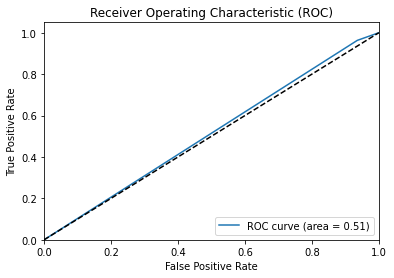

ROC AUC 값 : 0.5137


In [ ]:
# 3단계
plot_roc(y_pred,Y_test)
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(Y_test,y_pred)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

In [ ]:
y_pred # 3단계

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]
if tp == 0:
    tp = 1
if tn == 0:
    tn = 1
if fp == 0:
    fp = 1
if fn == 0:
    fn = 1
TPR = float(tp)/(float(tp)+float(fn))
FPR = float(fp)/(float(fp)+float(tn))
accuracy = round((float(tp) + float(tn))/(float(tp) +
                                          float(fp) + float(fn) + float(tn)), 3)
specitivity = round(float(tn)/(float(tn) + float(fp)), 3)
sensitivity = round(float(tp)/(float(tp) + float(fn)), 3)
mcc = round((float(tp)*float(tn) - float(fp)*float(fn))/math.sqrt(
    (float(tp)+float(fp))
    * (float(tp)+float(fn))
    * (float(tn)+float(fp))
    * (float(tn)+float(fn))
), 3)

f_output = open('binary_lstm_open_close_phase3_dropout_batch_Normal_3단계 test.txt', 'a')
f_output.write('=======\n')
f_output.write('{}epochs_{}batch\n'.format(
    20, 10))
f_output.write('TN: {}\n'.format(tn))
f_output.write('FN: {}\n'.format(fn))
f_output.write('TP: {}\n'.format(tp))
f_output.write('FP: {}\n'.format(fp))
f_output.write('TPR: {}\n'.format(TPR))
f_output.write('FPR: {}\n'.format(FPR))
f_output.write('accuracy: {}\n'.format(accuracy))
f_output.write('specitivity: {}\n'.format(specitivity))
f_output.write("sensitivity : {}\n".format(sensitivity))
f_output.write("mcc : {}\n".format(mcc))
f_output.write("{}".format(report))
f_output.write('=======\n')
f_output.close()

In [ ]:
# 예측.
# y_hat = model.predict(x_test, batch_size = 1)
print(len(y_test))
print(len(y_pred))

58
58


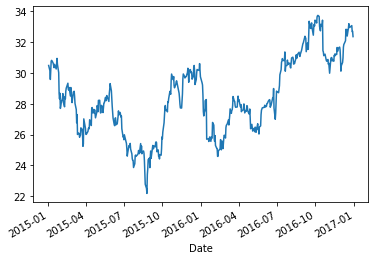

In [ ]:
train_sample_df['Adj Close'].plot()

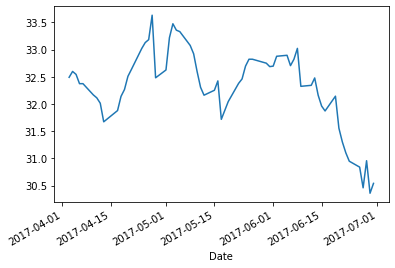

In [ ]:
test_sample_df['Adj Close'].plot()

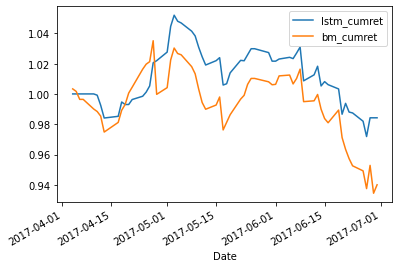

In [ ]:
# 3단계 
lstm_book_df = test_sample_df[['Adj Close','next_rtn']].copy()
# ### 이 문제에 있어서 Series와 DataFrame의 차이는 뭐지?
t1 = pd.DataFrame(data = y_pred,columns=['position'],index = lstm_book_df.index[5:])
lstm_book_df = lstm_book_df.join(t1,how='left')
lstm_book_df.fillna(0,inplace=True)
lstm_book_df['ret'] = lstm_book_df['Adj Close'].pct_change()
lstm_book_df['lstm_ret'] = lstm_book_df['next_rtn'] * lstm_book_df['position'].shift(1)
lstm_book_df['lstm_cumret'] = (lstm_book_df['lstm_ret'] + 1).cumprod()
lstm_book_df['bm_cumret'] = (lstm_book_df['ret'] + 1).cumprod()
lstm_book_df[['lstm_cumret','bm_cumret']].plot()

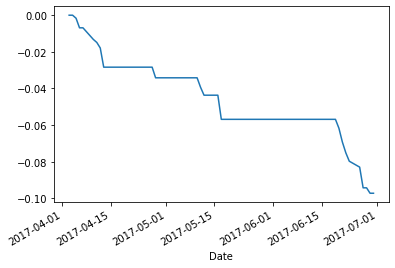

In [ ]:
historical_max = lstm_book_df['Adj Close'].cummax()
daily_drawdown = lstm_book_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [ ]:
CAGR = lstm_book_df.loc[lstm_book_df.index[-1],'bm_cumret'] ** (252./len(lstm_book_df.index)) -1
Sharpe = np.mean(lstm_book_df['ret']) / np.std(lstm_book_df['ret']) * np.sqrt(252.)
VOL = np.std(lstm_book_df['ret']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  -21.92 %
Sharpe :  -1.62
VOL :  14.82 %
MDD :  9.73 %


In [ ]:
CAGR = lstm_book_df.loc[lstm_book_df.index[-1],'lstm_cumret'] ** (252./len(lstm_book_df.index)) -1
Sharpe = np.mean(lstm_book_df['lstm_ret']) / np.std(lstm_book_df['lstm_ret']) * np.sqrt(252.)
VOL = np.std(lstm_book_df['lstm_ret']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  -6.16 %
Sharpe :  -0.54
VOL :  10.87 %
MDD :  9.73 %


In [ ]:
x_train.shape

(499, 5, 22)

In [ ]:
y_train.shape

(499, 2)